# Lab 4: CIFAR 10 Classification

The goal of this notebook is to implement a simple conv net to classify CIFAR10 images.

# Imports

In [ ]:
import os

from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import tensorflow as tf

In [ ]:
# check tensorflow version, we want the one that support eager mode
tf.__version__

'2.4.1'

In [ ]:
BATCH_SIZE = 1024 
EPOCHS = 25

# Dataset

Load CIFAR10 dataset, split training set into train and validation set

In [ ]:
from tensorflow.keras.datasets import cifar10, mnist

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print('x_train_full shape: {}, y_train_full.shape: {}'
      .format(x_train_full.shape, y_train_full.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

170500096/170498071 [==============================] - 4s 0us/step
x_train_full shape: (50000, 32, 32, 3), y_train_full.shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test.shape: (10000, 1)


In [ ]:
y_train_full = y_train_full.reshape(y_train_full.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print('y_train_full shape: {}, y_test shape: {}'
      .format(y_train_full.shape, y_test.shape))

y_train_full shape: (50000,), y_test shape: (10000,)


In [ ]:
# create validation set
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

x_train: (40000, 32, 32, 3), y_train: (40000,), x_val: (10000, 32, 32, 3), y_val: (10000,)


Lets plot 25 random images to get some idea about the dataset

In [ ]:
# pick 25 random images and plot
idxs = np.random.randint(x_train.shape[0], size=25)
images = x_train[idxs]
labels = y_train[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

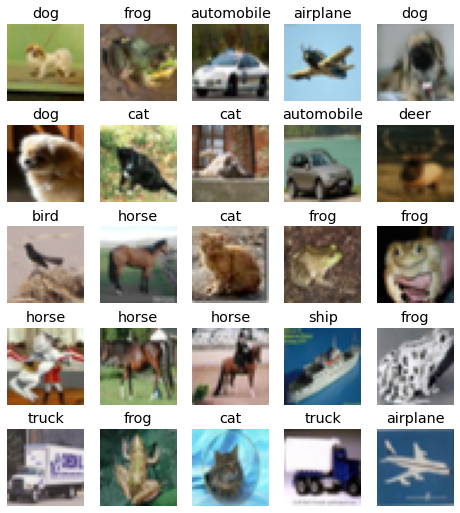

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = labels[i]
  ax.set_title(classnames[idx])
  
plt.show()

In [ ]:
def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, x_train.shape[0] - batch_size)
    yield x_train[offset:offset+batch_size], y_train[offset:offset + batch_size]

# Build a model

In [ ]:
model_base = tf.keras.models.Sequential()
model_base.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_base.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_base.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_base.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_base.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model_base.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_base.add(tf.keras.layers.Flatten())
model_base.add(tf.keras.layers.Dense(128, activation='relu'))

model_base.add(tf.keras.layers.Dense(10))
model_base.add(tf.keras.layers.Activation('softmax'))
model_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [ ]:
model_base.compile(
    optimizer=tf.optimizers.Adam(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
history_base = model_base.fit_generator(
    train_gen(BATCH_SIZE), epochs=EPOCHS, 
    steps_per_epoch=np.ceil(x_train.shape[0]/BATCH_SIZE).astype(int) ,
    validation_data = (x_val, y_val),
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
40/40 [==============================] - 35s 57ms/step - loss: 12.0355 - sparse_categorical_accuracy: 0.1235 - val_loss: 2.0189 - val_sparse_categorical_accuracy: 0.2553
Epoch 2/25
40/40 [==============================] - 2s 44ms/step - loss: 1.9049 - sparse_categorical_accuracy: 0.3017 - val_loss: 1.6786 - val_sparse_categorical_accuracy: 0.3879
Epoch 3/25
40/40 [==============================] - 2s 43ms/step - loss: 1.6201 - sparse_categorical_accuracy: 0.4116 - val_loss: 1.5437 - val_sparse_categorical_accuracy: 0.4424
Epoch 4/25
40/40 [==============================] - 2s 43ms/step - loss: 1.4982 - sparse_categorical_accuracy: 0.4607 - val_loss: 1.4580 - val_sparse_categorical_accuracy: 0.4775
Epoch 5/25
40/40 [==============================] - 2s 44ms/step - loss: 1.4035 - sparse_categorical_accuracy: 0.5004 - val_loss: 1.3997 - val_sparse_categorical_accuracy: 0.5034
Epoch 6/25
40/40 [==============================] - 2s 43ms/step - loss: 1.3253 - sparse_categorical_ac

In [ ]:
model_batch = tf.keras.models.Sequential()

model_batch.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_batch.add(tf.keras.layers.BatchNormalization())
model_batch.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_batch.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_batch.add(tf.keras.layers.BatchNormalization())
model_batch.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_batch.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model_batch.add(tf.keras.layers.BatchNormalization())
model_batch.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_batch.add(tf.keras.layers.Flatten())
model_batch.add(tf.keras.layers.Dense(128, activation='relu'))
model_batch.add(tf.keras.layers.Dense(10))
model_batch.add(tf.keras.layers.Activation('softmax'))
model_batch.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)        

In [ ]:
model_batch.compile(
    optimizer=tf.optimizers.Adam(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
history_batch = model_batch.fit_generator(
    train_gen(BATCH_SIZE), epochs=EPOCHS, 
    steps_per_epoch=np.ceil(x_train.shape[0]/BATCH_SIZE).astype(int) ,
    validation_data = (x_val, y_val),
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
40/40 [==============================] - 3s 60ms/step - loss: 2.1675 - sparse_categorical_accuracy: 0.2905 - val_loss: 3.2617 - val_sparse_categorical_accuracy: 0.2552
Epoch 2/25
40/40 [==============================] - 2s 51ms/step - loss: 1.3371 - sparse_categorical_accuracy: 0.5266 - val_loss: 2.0904 - val_sparse_categorical_accuracy: 0.3569
Epoch 3/25
40/40 [==============================] - 2s 51ms/step - loss: 1.1267 - sparse_categorical_accuracy: 0.6044 - val_loss: 1.8915 - val_sparse_categorical_accuracy: 0.3779
Epoch 4/25
40/40 [==============================] - 2s 51ms/step - loss: 0.9780 - sparse_categorical_accuracy: 0.6601 - val_loss: 1.2839 - val_sparse_categorical_accuracy: 0.5360
Epoch 5/25
40/40 [==============================] - 2s 51ms/step - loss: 0.8788 - sparse_categorical_accuracy: 0.6952 - val_loss: 1.1748 - val_sparse_categorical_accuracy: 0.5842
Epoch 6/25
40/40 [==============================] - 2s 51ms/step - loss: 0.7647 - sparse_categorical_accu

In [ ]:
model_batch_dp = tf.keras.models.Sequential()

model_batch_dp.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_batch_dp.add(tf.keras.layers.BatchNormalization())
model_batch_dp.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_batch_dp.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_batch_dp.add(tf.keras.layers.BatchNormalization())
model_batch_dp.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_batch_dp.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model_batch_dp.add(tf.keras.layers.BatchNormalization())
model_batch_dp.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model_batch_dp.add(tf.keras.layers.Flatten())
model_batch_dp.add(tf.keras.layers.Dense(128, activation='relu'))
model_batch_dp.add(tf.keras.layers.Dropout(0.4))
model_batch_dp.add(tf.keras.layers.Dense(10))
model_batch_dp.add(tf.keras.layers.Activation('softmax'))
model_batch_dp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)        

In [ ]:
model_batch_dp.compile(
    optimizer=tf.optimizers.Adam(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
history_batch_dp = model_batch_dp.fit_generator(
    train_gen(BATCH_SIZE), epochs=EPOCHS, 
    steps_per_epoch=np.ceil(x_train.shape[0]/BATCH_SIZE).astype(int) ,
    validation_data = (x_val, y_val),
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
40/40 [==============================] - 3s 60ms/step - loss: 2.4798 - sparse_categorical_accuracy: 0.2336 - val_loss: 4.1122 - val_sparse_categorical_accuracy: 0.1537
Epoch 2/25
40/40 [==============================] - 2s 52ms/step - loss: 1.6082 - sparse_categorical_accuracy: 0.4187 - val_loss: 2.1816 - val_sparse_categorical_accuracy: 0.2752
Epoch 3/25
40/40 [==============================] - 2s 52ms/step - loss: 1.3610 - sparse_categorical_accuracy: 0.5142 - val_loss: 1.6160 - val_sparse_categorical_accuracy: 0.4335
Epoch 4/25
40/40 [==============================] - 2s 52ms/step - loss: 1.1807 - sparse_categorical_accuracy: 0.5835 - val_loss: 1.5452 - val_sparse_categorical_accuracy: 0.4523
Epoch 5/25
40/40 [==============================] - 2s 53ms/step - loss: 1.0778 - sparse_categorical_accuracy: 0.6213 - val_loss: 1.4578 - val_sparse_categorical_accuracy: 0.4672
Epoch 6/25
40/40 [==============================] - 2s 52ms/step - loss: 0.9889 - sparse_categorical_accu

### Plot Loss and Accuracy

In [ ]:
def plot(losses, accuracies, subplot_title, legends):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
  
  for loss in losses: 
    ax1.plot(loss)
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title(subplot_title[0])
  ax1.legend(legends)
  
  for accuracy in accuracies: 
    ax2.plot(accuracy)
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title(subplot_title[1])
  ax2.legend(legends)
    
  plt.show()

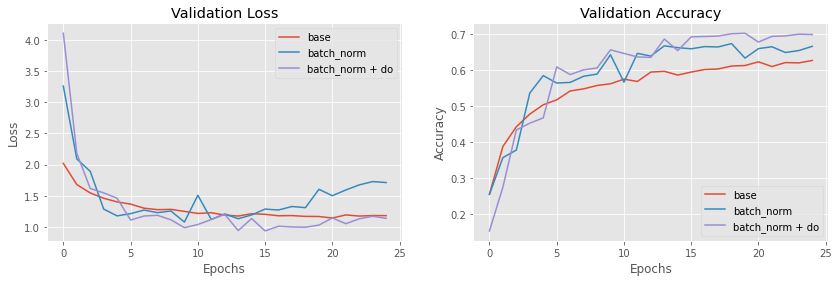

In [ ]:
# Validation
plot([history_base.history['val_loss'], history_batch.history['val_loss'], history_batch_dp.history['val_loss']], 
     [history_base.history['val_sparse_categorical_accuracy'], history_batch.history['val_sparse_categorical_accuracy'], history_batch_dp.history['val_sparse_categorical_accuracy']], 
     subplot_title=['Validation Loss', 'Validation Accuracy'], 
     legends = ['base', 'batch_norm', 'batch_norm + do'], 
    )

# Test accuracy

Next, we plot the model predictions on test set

In [ ]:
idxs = np.random.randint(x_test.shape[0], size=25)
images = x_test[idxs]
true_labels = y_test[idxs]

preds = np.argmax(model_batch_dp.predict(images), axis=1)

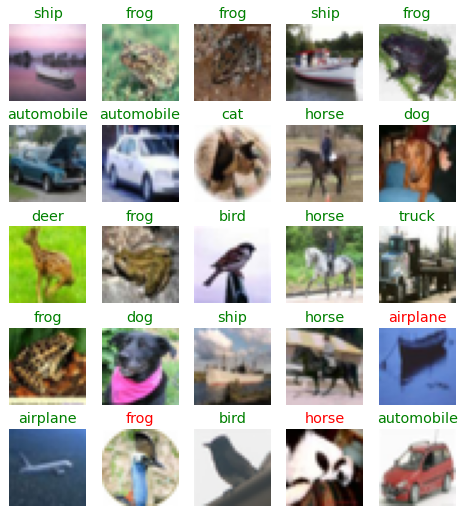

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = preds[i]
  color = 'g' if idx == true_labels[i] else 'r'
  ax.set_title(classnames[idx], color=color)

plt.show()